### Importing the dataset via ucimlrepo as per mention on the python code in datarepo.

In [9]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
# metadata 
#print(bike_sharing.metadata) 
# variable information 
print(bike_sharing.variables)

          name     role         type demographic  \
0      instant       ID      Integer        None   
1       dteday  Feature         Date        None   
2       season  Feature  Categorical        None   
3           yr  Feature  Categorical        None   
4         mnth  Feature  Categorical        None   
5           hr  Feature  Categorical        None   
6      holiday  Feature       Binary        None   
7      weekday  Feature  Categorical        None   
8   workingday  Feature       Binary        None   
9   weathersit  Feature  Categorical        None   
10        temp  Feature   Continuous        None   
11       atemp  Feature   Continuous        None   
12         hum  Feature   Continuous        None   
13   windspeed  Feature   Continuous        None   
14      casual    Other      Integer        None   
15  registered    Other      Integer        None   
16         cnt   Target      Integer        None   

                                          description units mis

# Library Import

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score

# Anomaly Detection (advanced)
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.utils.utility import standardizer

In [19]:
## Copying imported dataset into local DF to work with
g1dm = bike_sharing.data.original
g1dm.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# Dropping column instant
g1dm = g1dm.drop(columns=['instant'])
print(g1dm.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [21]:
# Checking the data type for all variable
g1dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [22]:
# Converting the dteday featue to date-time datatype for later extraction of date month
g1dm['dteday'] = pd.to_datetime(g1dm['dteday'])
g1dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [ ]:
### Few check to validate if data cleaning is required before we jump into analysis
print("Do null value exist",g1dm.isna().sum())
print("Duplicate values:",g1dm.duplicated().sum())

Do null value exist dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate values: 0


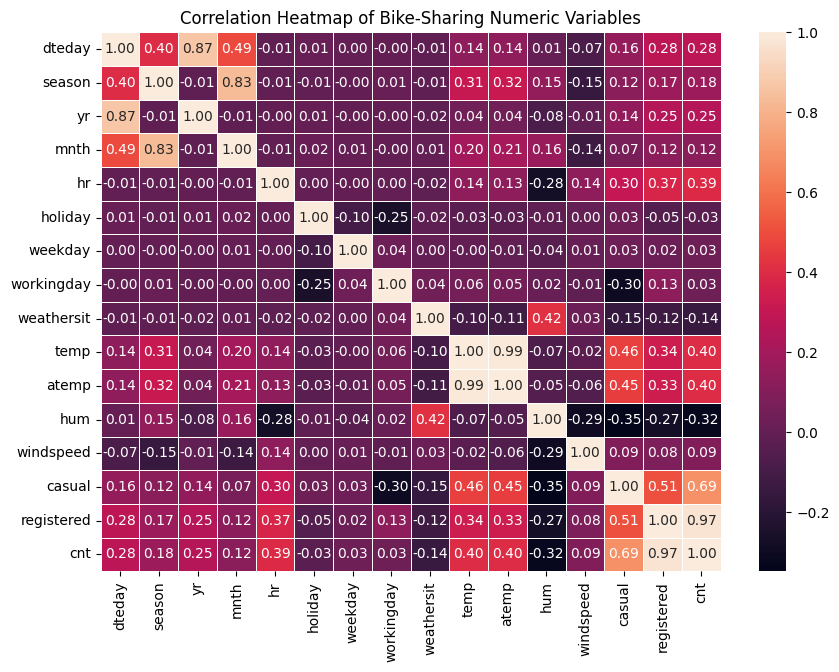

In [32]:
# Quick correlation check
plt.figure(figsize=(10, 7))
sns.heatmap(g1dm.corr(), annot=True, fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap of Bike-Sharing Numeric Variables")
plt.show()

In [33]:
g1dm_cnt_cl = g1dm.drop(columns=['registered', 'casual'])
g1dm_rc_cl = g1dm.drop(columns=['cnt'])

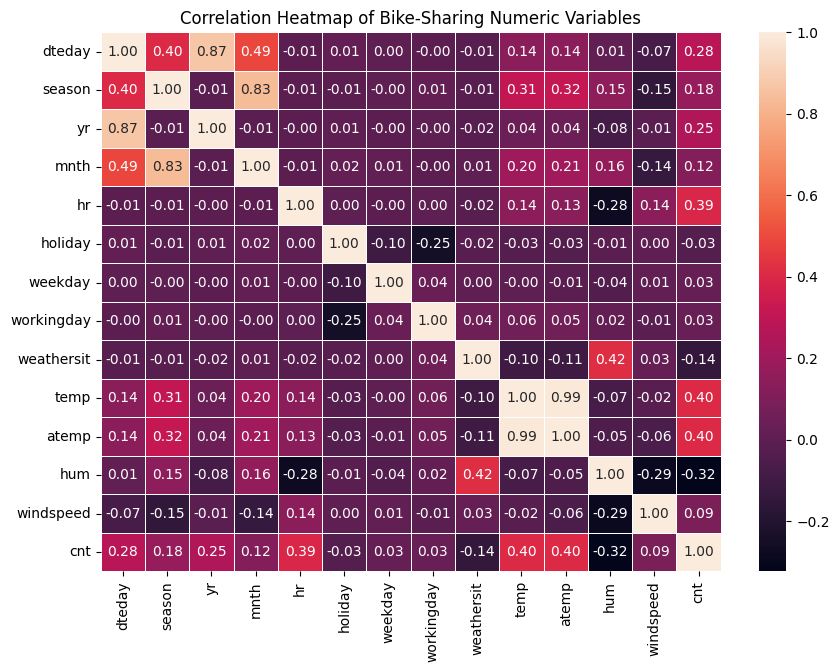

In [ ]:
# Quick correlation check
plt.figure(figsize=(10, 7))
sns.heatmap(g1dm_cnt_cl.corr(), annot=True, fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap of Bike-Sharing Numeric Variables")
plt.show()

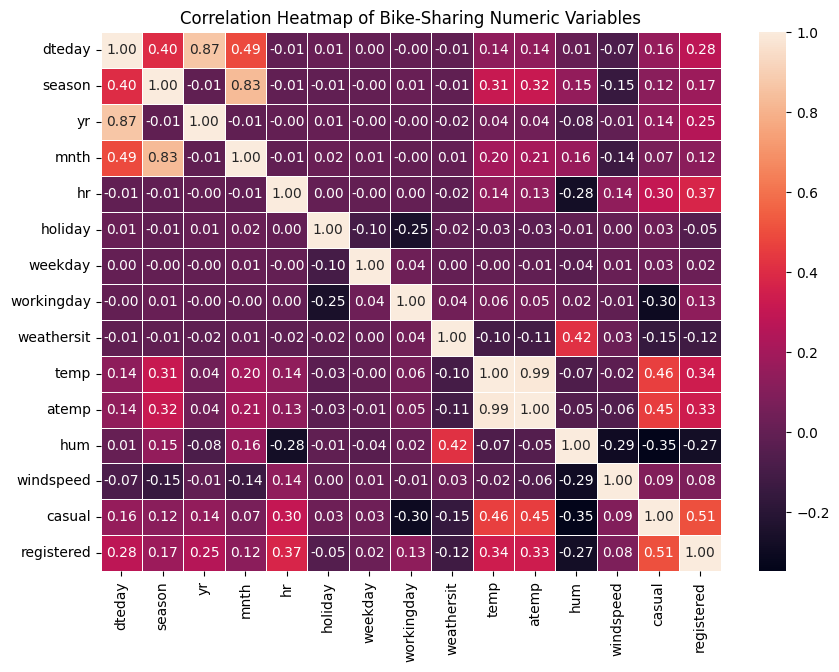

In [35]:
# Quick correlation check
plt.figure(figsize=(10, 7))
sns.heatmap(g1dm_rc_cl.corr(), annot=True, fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap of Bike-Sharing Numeric Variables")
plt.show()

In [88]:
# Feature preparastion for Clustering
features = ['hr', 'weekday', 'workingday', 'holiday', 'season', 'temp', 'atemp', 'hum', 'windspeed']
#X = g1dm_cnt_cl[features]
X = g1dm_rc_cl[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

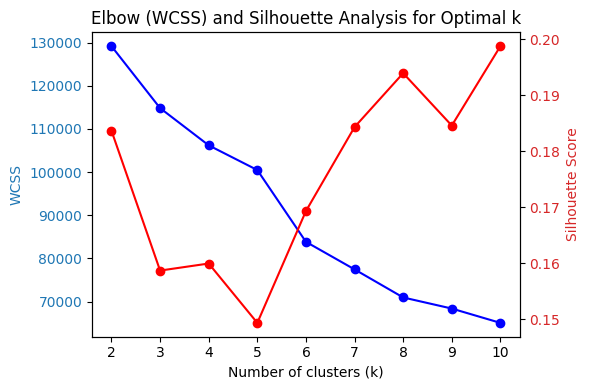

In [89]:
k_range = np.arange(2, 11)
wcss = []
sil_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    # WCSS for elbow
    wcss.append(kmeans.inertia_)
    # Silhouette score
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot both in one figure
fig, ax1 = plt.subplots(figsize=(6,4))

color = 'tab:blue'
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('WCSS', color=color)
ax1.plot(k_range, wcss, 'bo-', label='WCSS')
ax1.tick_params(axis='y', labelcolor=color)

# Secondary y-axis for silhouette
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(k_range, sil_scores, 'ro-', label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow (WCSS) and Silhouette Analysis for Optimal k')
fig.tight_layout()
plt.show()

In [84]:
# As per above plot k = 8 is the optimal option as per Silhouette and Elbow
kmeans = KMeans(n_clusters=5, random_state= 42, n_init='auto')
g1dm_cnt_cl['cluster'] = kmeans.fit_predict(X_scaled)

In [85]:
print(g1dm_cnt_cl['cluster'].value_counts())
g1dm_cnt_cl.groupby('cluster')['cnt'].mean().sort_values(ascending=False)
g1dm_cnt_cl.groupby('cluster')[features].mean()

cluster
2    5377
1    4614
3    3812
0    3076
4     500
Name: count, dtype: int64


,hr,weekday,workingday,holiday,season,temp,atemp,hum,windspeed,cnt
cluster,,,,,,,,,,
0,12.794213,2.980169,0.654421,0.0,3.932380,0.382549,0.378681,0.662962,0.174035,182.812094
1,11.583442,3.123971,0.684222,0.0,1.192458,0.294972,0.293880,0.582137,0.221977,101.758561
2,15.717129,3.030314,0.731821,0.0,2.657988,0.685044,0.642193,0.533121,0.208833,355.657988
3,4.610703,2.995540,0.724029,0.0,2.719307,0.572597,0.543602,0.787274,0.137674,70.836044
4,11.566000,1.814000,0.000000,1.0,2.440000,0.466400,0.444850,0.615360,0.192932,156.870000


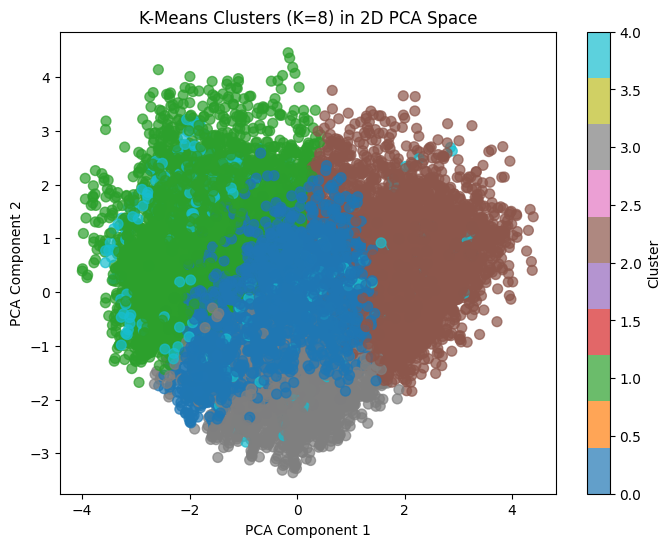

In [86]:
# Reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=g1dm_cnt_cl['cluster'],
    cmap='tab10',
    s=50,
    alpha=0.7
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (K=8) in 2D PCA Space')
plt.colorbar(scatter, label='Cluster')
plt.show()